<a href="https://colab.research.google.com/github/koushikvrk1234/.github-workflows/blob/main/hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

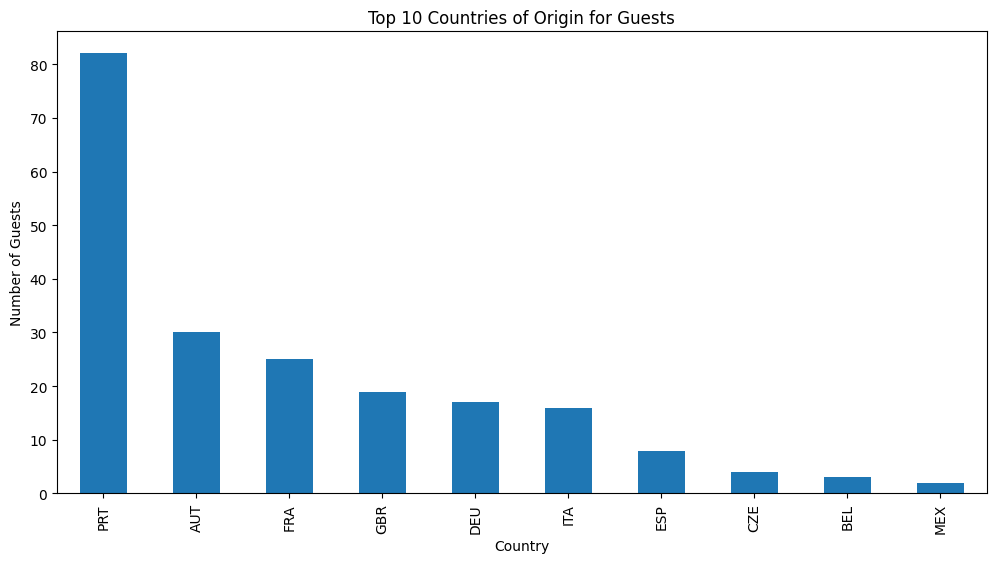

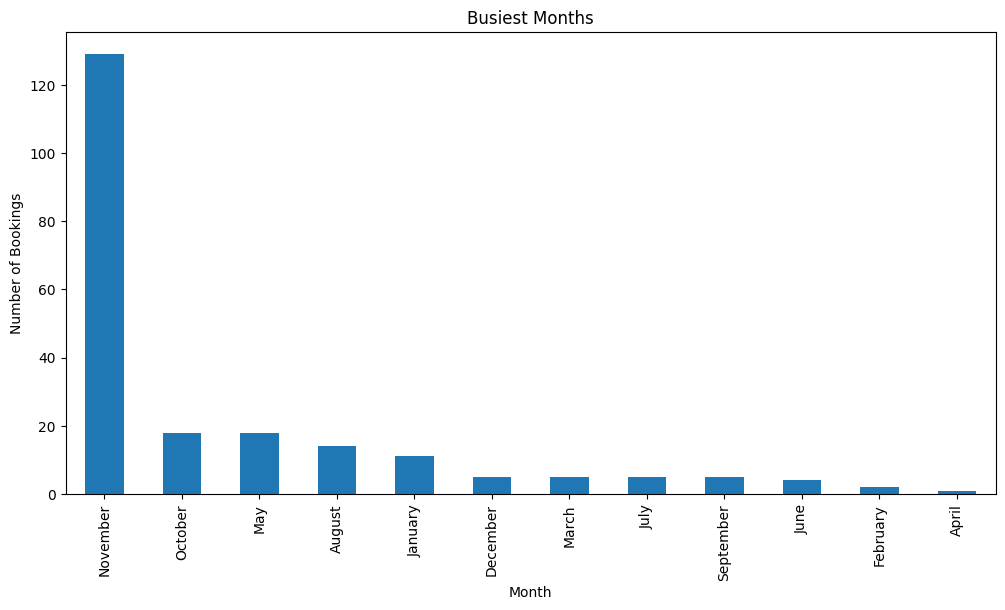

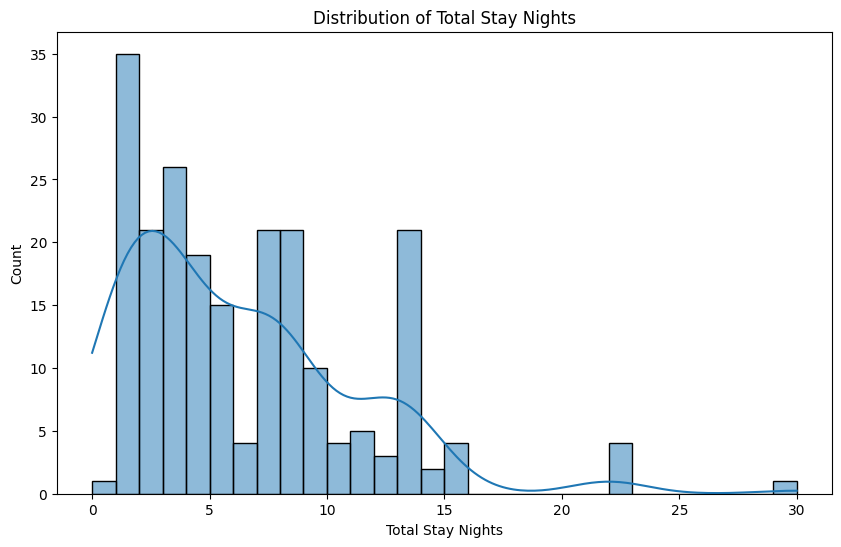

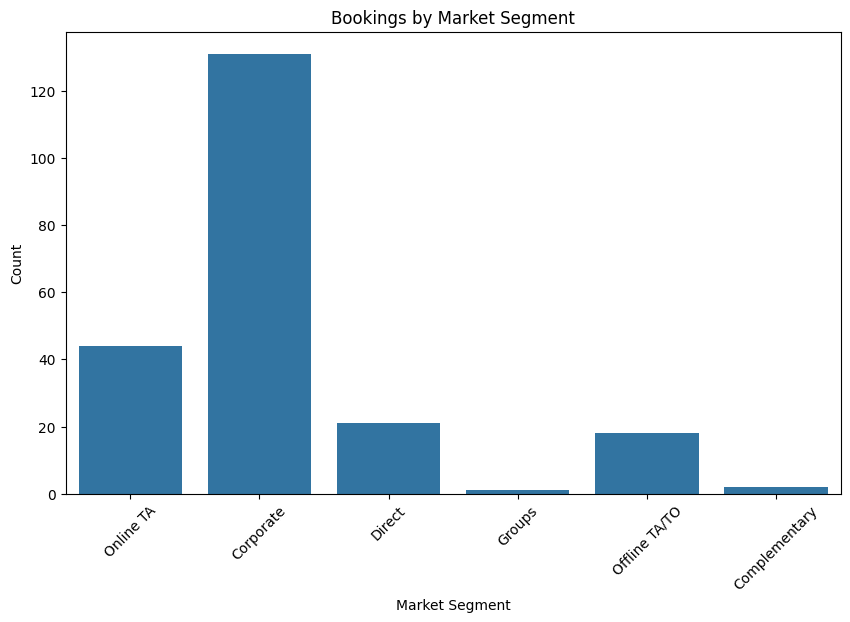

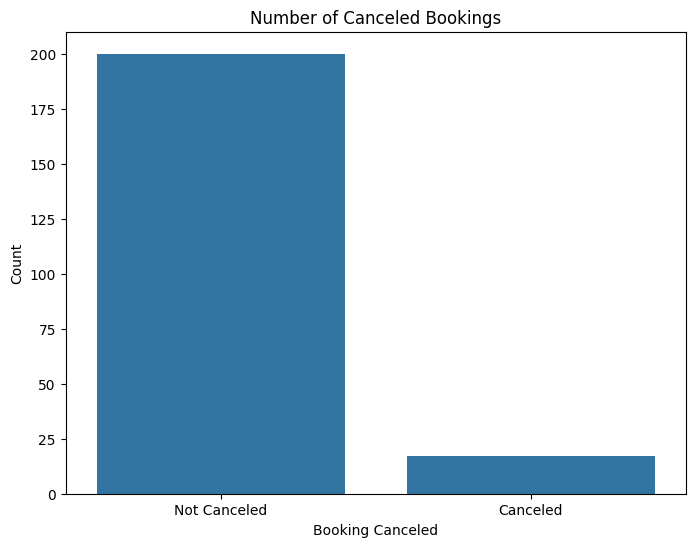

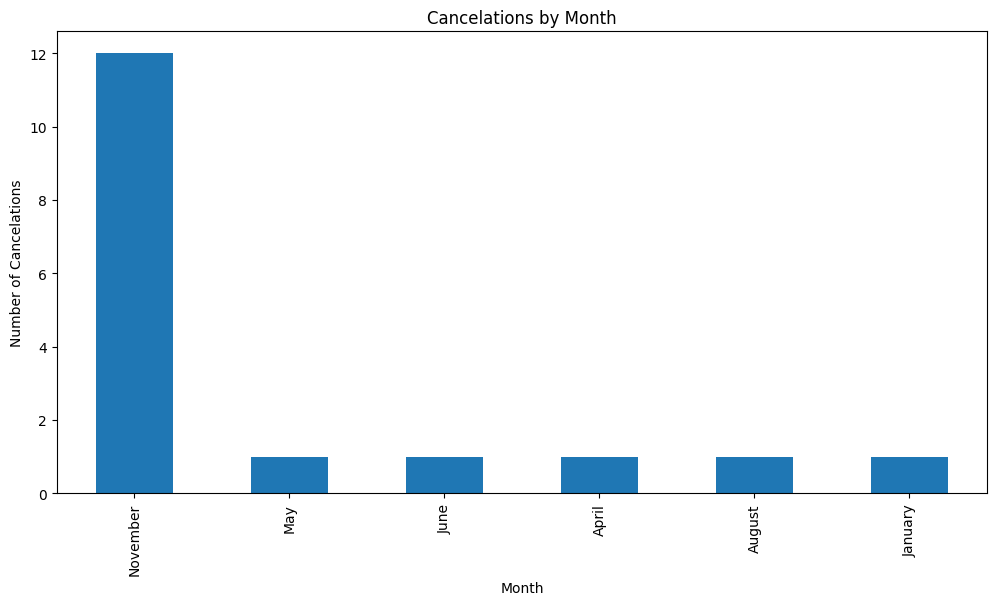

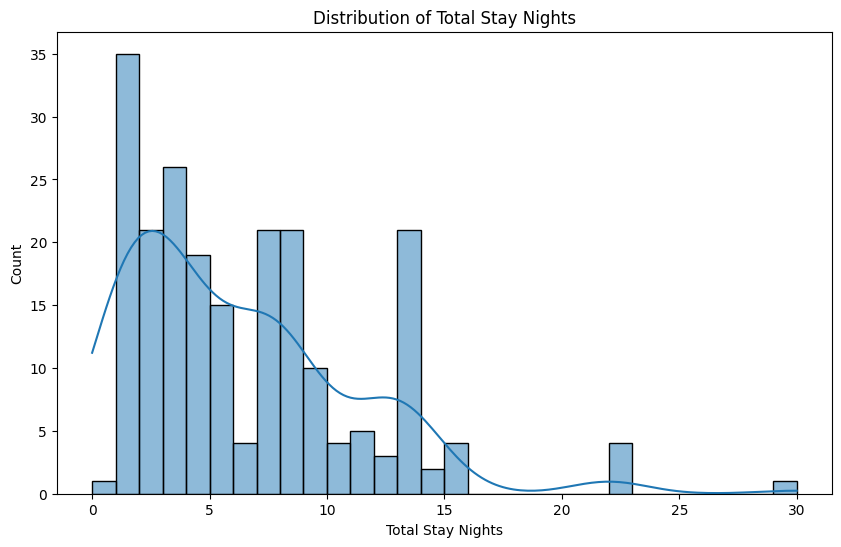

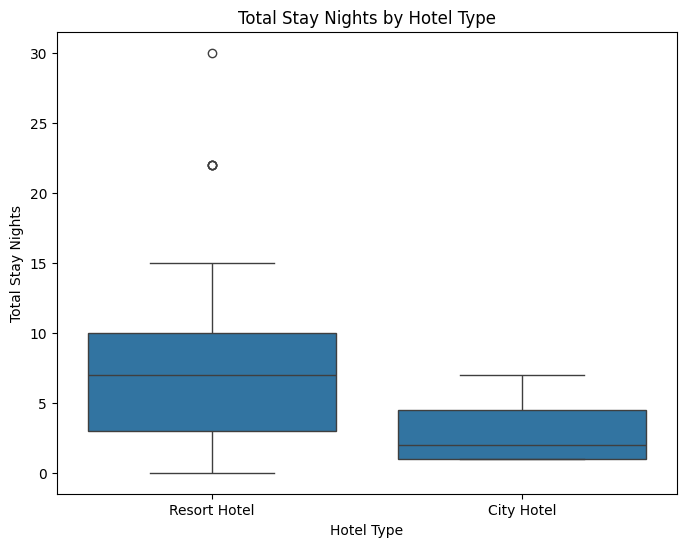

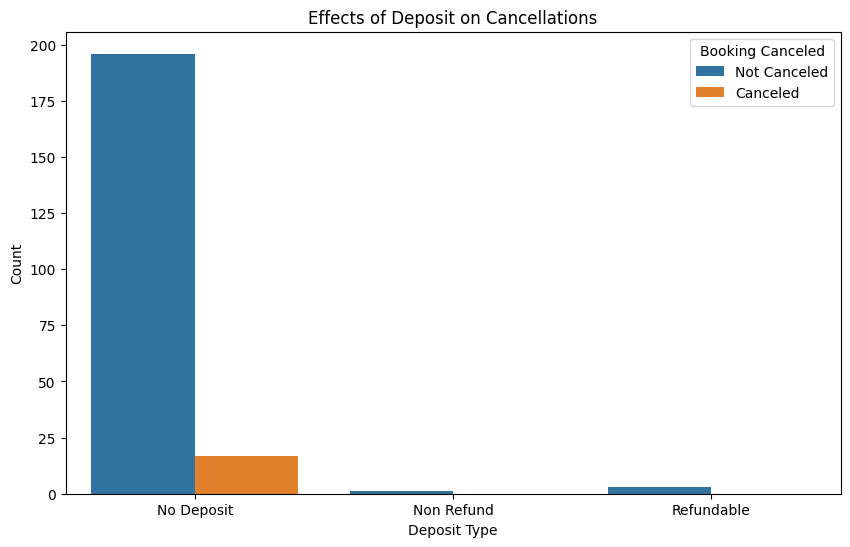

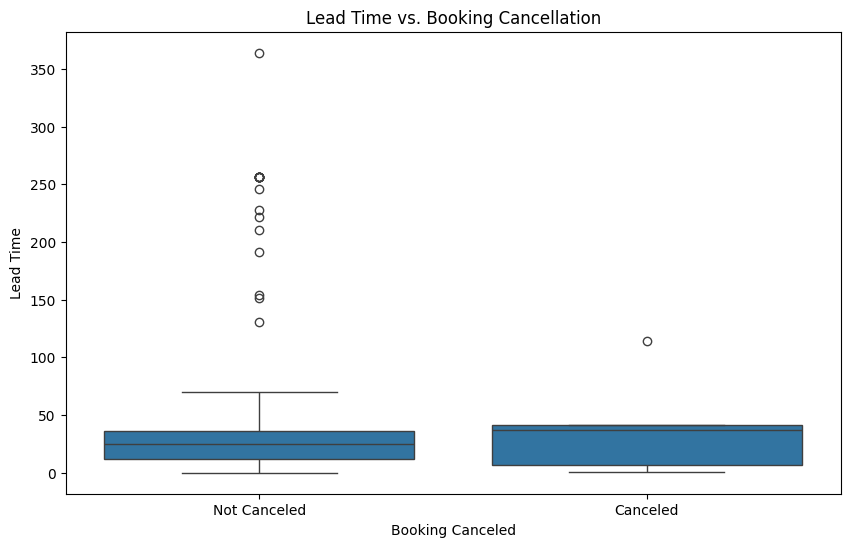

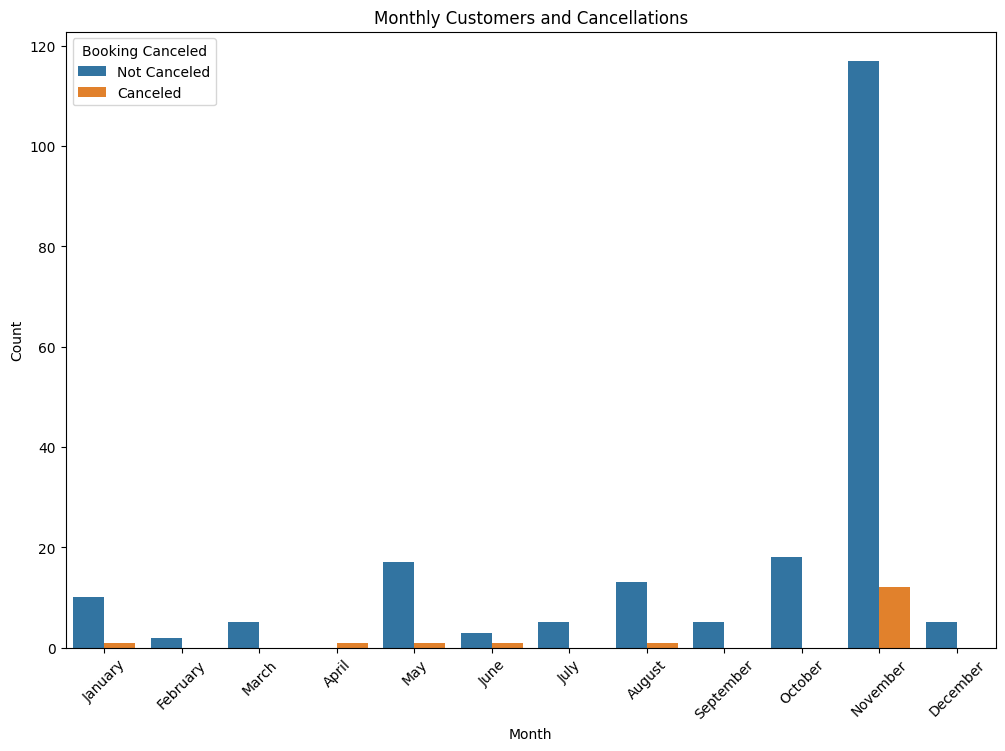

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/hotel_booking.csv", low_memory=False)

# Convert columns with mixed types to appropriate types
mixed_type_cols = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list']
for col in mixed_type_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Where do the guests come from?
plt.figure(figsize=(12, 6))
guests_by_country = df['country'].value_counts().nlargest(10)
guests_by_country.plot(kind='bar')
plt.title('Top 10 Countries of Origin for Guests')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.show()

# Which are the busiest month?
plt.figure(figsize=(12, 6))
busiest_months = df['arrival_date_month'].value_counts()
busiest_months.plot(kind='bar')
plt.title('Busiest Months')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

# How long do people stay at the hotels?
total_stay_nights = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
plt.figure(figsize=(10, 6))
sns.histplot(total_stay_nights, bins=30, kde=True)
plt.title('Distribution of Total Stay Nights')
plt.xlabel('Total Stay Nights')
plt.ylabel('Count')
plt.show()

# Bookings by market segment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='market_segment')
plt.title('Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# How many bookings were canceled?
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_canceled')
plt.title('Number of Canceled Bookings')
plt.xlabel('Booking Canceled')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

# Which month has the highest number of cancelations?
plt.figure(figsize=(12, 6))
canceled_by_month = df[df['is_canceled'] == 1]['arrival_date_month'].value_counts()
canceled_by_month.plot(kind='bar')
plt.title('Cancelations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cancelations')
plt.show()

# The number of nights spent at hotels.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=total_stay_nights, bins=30, kde=True)
plt.title('Distribution of Total Stay Nights')
plt.xlabel('Total Stay Nights')
plt.ylabel('Count')
plt.show()

# Hotel type with more time spent.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='hotel', y=total_stay_nights)
plt.title('Total Stay Nights by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Total Stay Nights')
plt.show()

# Effects of deposit on cancellations by segments.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='deposit_type', hue='is_canceled')
plt.title('Effects of Deposit on Cancellations')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.legend(title='Booking Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

# Relationship of lead time with cancellation.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title('Lead Time vs. Booking Cancellation')
plt.xlabel('Booking Canceled')
plt.ylabel('Lead Time')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

# Monthly customers and cancellations.
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='arrival_date_month', hue='is_canceled', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Monthly Customers and Cancellations')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Booking Canceled', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.show()
